***1. Cargar el conjunto de datos***

In [99]:
import pandas as pd
import matplotlib.pyplot as plt

df = pd.read_csv("dengue_abierto.csv")

***2. Revision del DataFrame***

In [100]:
df.head()

,FECHA_ACTUALIZACION,ID_REGISTRO,SEXO,EDAD_ANOS,ENTIDAD_RES,MUNICIPIO_RES,HABLA_LENGUA_INDIG,INDIGENA,ENTIDAD_UM_NOTIF,MUNICIPIO_UM_NOTIF,...,INMUNOSUPR,CIRROSIS_HEPATICA,EMBARAZO,DEFUNCION,DICTAMEN,TOMA_MUESTRA,RESULTADO_PCR,ESTATUS_CASO,ENTIDAD_ASIG,MUNICIPIO_ASIG
0,2024-02-19,1304867,1,11,30,48,2,2,30,48,...,2,2,2,2,5.0,2,5,1,30,48
1,2024-02-19,1304870,2,12,25,12,2,2,25,12,...,2,2,2,2,5.0,1,5,2,25,12
2,2024-02-19,1304893,1,24,23,4,2,2,23,4,...,2,2,2,2,5.0,2,5,1,23,4
3,2024-02-19,1304896,2,38,30,206,2,2,30,206,...,2,2,2,2,5.0,1,5,1,30,206
4,2024-02-19,1304928,2,4,31,90,2,1,31,90,...,2,2,2,2,5.0,2,5,1,31,90


***3. Verificacion y manejo de datos faltantes***


In [101]:
# Filtra las columnas numéricas del DataFrame
df_numerico = df.select_dtypes(include=['int64', 'float64'])

# Imputa los valores faltantes en las columnas numéricas con la mediana
df_numerico = df_numerico.fillna(df_numerico.median())

# Reemplaza las columnas numéricas en el DataFrame original con las imputadas
for col in df_numerico.columns:
    df[col] = df_numerico[col]


***4. Informacion estadistica basica***

In [102]:
df.describe()

,ID_REGISTRO,SEXO,EDAD_ANOS,ENTIDAD_RES,MUNICIPIO_RES,HABLA_LENGUA_INDIG,INDIGENA,ENTIDAD_UM_NOTIF,MUNICIPIO_UM_NOTIF,INSTITUCION_UM_NOTIF,...,INMUNOSUPR,CIRROSIS_HEPATICA,EMBARAZO,DEFUNCION,DICTAMEN,TOMA_MUESTRA,RESULTADO_PCR,ESTATUS_CASO,ENTIDAD_ASIG,MUNICIPIO_ASIG
count,2.656100e+04,26561.000000,26561.00000,26561.000000,26561.000000,26561.000000,26561.000000,26561.000000,26561.000000,26561.000000,...,26561.000000,26561.000000,26561.000000,26561.000000,26561.000000,26561.000000,26561.000000,26561.000000,26561.000000,26561.000000
mean,1.315828e+06,1.474380,26.36275,17.076691,31.168518,1.989910,1.987689,17.075713,33.040209,7.409096,...,1.998343,1.999322,1.987237,1.997101,4.996875,1.501412,4.823990,1.564098,17.241105,32.789729
std,8.243057e+03,0.499353,17.31796,8.058724,62.437649,0.099943,0.110273,8.065406,81.466430,5.207085,...,0.040668,0.026024,0.112253,0.053765,0.060352,0.500007,0.628519,0.777970,8.802690,75.169210
min,1.299508e+06,1.000000,0.00000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,2.000000,...,1.000000,1.000000,1.000000,1.000000,3.000000,1.000000,1.000000,1.000000,1.000000,1.000000
25%,1.308845e+06,1.000000,12.00000,12.000000,2.000000,2.000000,2.000000,12.000000,2.000000,4.000000,...,2.000000,2.000000,2.000000,2.000000,5.000000,1.000000,5.000000,1.000000,12.000000,2.000000
50%,1.315957e+06,1.000000,23.00000,14.000000,7.000000,2.000000,2.000000,14.000000,6.000000,4.000000,...,2.000000,2.000000,2.000000,2.000000,5.000000,2.000000,5.000000,1.000000,14.000000,6.000000
75%,1.322932e+06,2.000000,38.00000,23.000000,38.000000,2.000000,2.000000,23.000000,38.000000,12.000000,...,2.000000,2.000000,2.000000,2.000000,5.000000,2.000000,5.000000,2.000000,23.000000,38.000000
max,1.329959e+06,2.000000,110.00000,35.000000,570.000000,2.000000,2.000000,32.000000,999.000000,99.000000,...,2.000000,2.000000,2.000000,2.000000,5.000000,2.000000,5.000000,3.000000,99.000000,999.000000


***5. Identificacion de variables categoricas***

In [103]:
categorical_cols = df.select_dtypes(include=['object'])
categorical_cols.columns

Index(['FECHA_ACTUALIZACION', 'FECHA_SIGN_SINTOMAS'], dtype='object')

***6. Medidas de tendencia central***

In [104]:
def resumen_numerico(df):
    for col in df.select_dtypes(include=['number']):
        print(f"Columna: {col}")
        print(f"Media: {df[col].mean()}")
        print(f"Mediana: {df[col].median()}")
        print(f"Moda: {df[col].mode()}")
        print(f"Desviacion estantdar: {df[col].std()}")
        print()

resumen_numerico(df)

Columna: ID_REGISTRO
Media: 1315828.3478408193
Mediana: 1315957.0
Moda: 0        1299508
1        1299543
2        1299553
3        1299559
4        1299569
          ...   
26556    1329955
26557    1329956
26558    1329957
26559    1329958
26560    1329959
Name: ID_REGISTRO, Length: 26561, dtype: int64
Desviacion estantdar: 8243.056803996888

Columna: SEXO
Media: 1.4743797296788526
Mediana: 1.0
Moda: 0    1
Name: SEXO, dtype: int64
Desviacion estantdar: 0.4993525705205533

Columna: EDAD_ANOS
Media: 26.36274989646474
Mediana: 23.0
Moda: 0    12
Name: EDAD_ANOS, dtype: int64
Desviacion estantdar: 17.31796013974048

Columna: ENTIDAD_RES
Media: 17.076691389631414
Mediana: 14.0
Moda: 0    12
Name: ENTIDAD_RES, dtype: int64
Desviacion estantdar: 8.058723617412493

Columna: MUNICIPIO_RES
Media: 31.168517751590677
Mediana: 7.0
Moda: 0    1
Name: MUNICIPIO_RES, dtype: int64
Desviacion estantdar: 62.43764893325697

Columna: HABLA_LENGUA_INDIG
Media: 1.9899100184481007
Mediana: 2.0
Moda: 0    2

***7. Conteo de casos por Categoria***

In [105]:
for col in categorical_cols.columns:
    print(df[col].value_counts())

FECHA_ACTUALIZACION
2024-02-19    26561
Name: count, dtype: int64
FECHA_SIGN_SINTOMAS
2024-01-15    835
2024-01-21    775
2024-01-22    769
2024-01-20    760
2024-01-08    750
2024-01-14    735
2024-01-29    707
2024-01-28    691
2024-01-16    685
2024-01-01    669
2024-01-07    660
2024-01-19    660
2024-01-12    648
2024-01-06    646
2024-01-23    641
2024-01-13    639
2024-01-09    631
2024-01-10    623
2024-01-18    615
2024-01-05    604
2024-01-11    598
2024-01-26    589
2024-01-30    585
2024-01-24    578
2024-01-27    577
2024-01-02    565
2024-01-17    561
2024-01-03    558
2024-02-10    558
2024-01-25    552
2024-02-06    551
2024-01-04    548
2024-02-05    546
2024-02-07    503
2024-02-12    494
2024-02-04    476
2024-01-31    474
2024-02-03    474
2024-02-11    466
2024-02-09    458
2024-02-02    456
2024-02-08    452
2024-02-01    442
2024-02-13    341
2024-02-14    265
2024-02-15    119
2024-02-16     26
2024-02-17      6
Name: count, dtype: int64


***8. Casos por tipo de dengue***

In [106]:
print(df['TIPO_PACIENTE'].value_counts())

TIPO_PACIENTE
1    21062
2     5499
Name: count, dtype: int64


***9. Fallecimiento por tipo de dengue y edad***

In [107]:
for dengue_type in df['TIPO_PACIENTE'].unique():
    if dengue_type == 1: print(f"Tipo de dengue {dengue_type}: Clasico")
    else: print(f"Tipo de dengue {dengue_type}: Hemorrágico")
    for age in df['EDAD_ANOS'].unique():
        count = (df[(df['TIPO_PACIENTE'] == dengue_type) &
                    (df['EDAD_ANOS'] == age)]['DEFUNCION']).sum()
        print(f"{age} years: {count} deaths")

Tipo de dengue 1: Clasico
11 years: 1098 deaths
12 years: 1246 deaths
24 years: 1014 deaths
38 years: 624 deaths
4 years: 638 deaths
8 years: 1026 deaths
13 years: 1230 deaths
10 years: 1086 deaths
31 years: 802 deaths
22 years: 868 deaths
3 years: 438 deaths
15 years: 1028 deaths
69 years: 86 deaths
26 years: 798 deaths
25 years: 932 deaths
51 years: 444 deaths
20 years: 906 deaths
48 years: 444 deaths
44 years: 468 deaths
47 years: 454 deaths
40 years: 496 deaths
21 years: 860 deaths
5 years: 636 deaths
30 years: 818 deaths
62 years: 184 deaths
52 years: 370 deaths
28 years: 876 deaths
64 years: 164 deaths
16 years: 840 deaths
37 years: 624 deaths
84 years: 12 deaths
42 years: 466 deaths
59 years: 200 deaths
7 years: 910 deaths
74 years: 48 deaths
34 years: 712 deaths
33 years: 706 deaths
27 years: 858 deaths
1 years: 404 deaths
57 years: 228 deaths
55 years: 252 deaths
23 years: 1058 deaths
73 years: 28 deaths
41 years: 602 deaths
35 years: 618 deaths
14 years: 1124 deaths
6 years: 

92 years: 4 deaths
94 years: 0 deaths
103 years: 0 deaths
110 years: 2 deaths
Tipo de dengue 2: Hemorrágico
11 years: 426 deaths
12 years: 469 deaths
24 years: 180 deaths
38 years: 81 deaths
4 years: 138 deaths
8 years: 379 deaths
13 years: 403 deaths
10 years: 422 deaths
31 years: 178 deaths
22 years: 189 deaths
3 years: 98 deaths
15 years: 459 deaths
69 years: 29 deaths
26 years: 156 deaths
25 years: 180 deaths
51 years: 56 deaths
20 years: 208 deaths
48 years: 82 deaths
44 years: 66 deaths
47 years: 102 deaths
40 years: 92 deaths
21 years: 206 deaths
5 years: 194 deaths
30 years: 136 deaths
62 years: 39 deaths
52 years: 68 deaths
28 years: 148 deaths
64 years: 43 deaths
16 years: 390 deaths
37 years: 108 deaths
84 years: 10 deaths
42 years: 71 deaths
59 years: 44 deaths
7 years: 266 deaths
74 years: 27 deaths
34 years: 113 deaths
33 years: 100 deaths
27 years: 121 deaths
1 years: 102 deaths
57 years: 55 deaths
55 years: 90 deaths
23 years: 194 deaths
73 years: 38 deaths
41 years: 99

***10. Distribucion de casos por categoria***

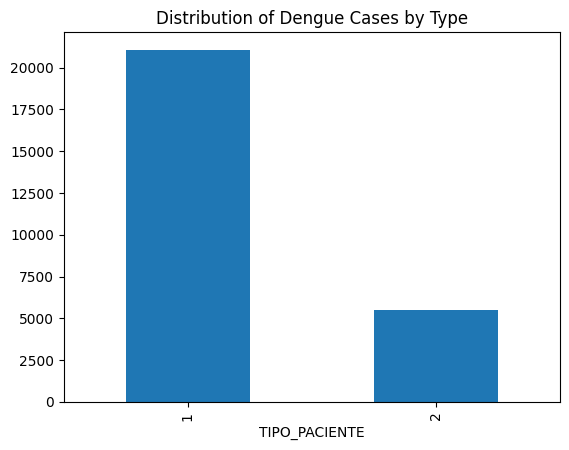

In [108]:
df['TIPO_PACIENTE'].value_counts().plot(kind='bar')
plt.title("Distribution of Dengue Cases by Type")
plt.show()

***11. Casos de dengue por mes***

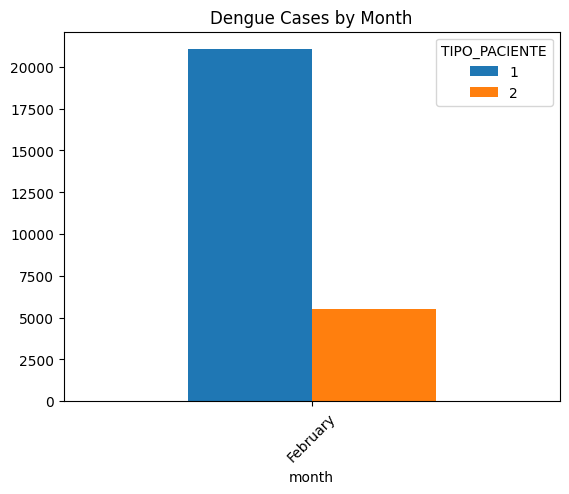

In [109]:
df['month'] = pd.to_datetime(df['FECHA_ACTUALIZACION']).dt.month_name()
df.groupby('month')['TIPO_PACIENTE'].value_counts().unstack().plot(kind='bar')
plt.title("Dengue Cases by Month")
plt.xticks(rotation=45)
plt.show()

***12. Casos de dengue por estado***

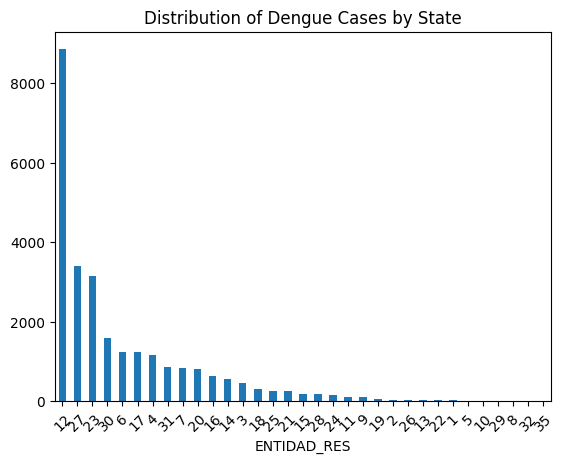

In [110]:
df['ENTIDAD_RES'].value_counts().plot(kind='bar')
plt.title("Distribution of Dengue Cases by State")
plt.xticks(rotation=45)
plt.show()

***13. Correlación entre 2 variables***

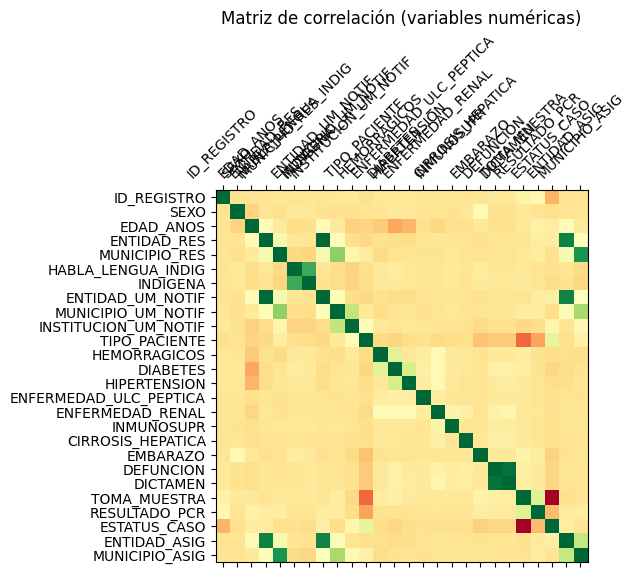

Correlación entre 'EDAD_ANOS' y 'HEMORRAGICOS': -0.1095992146633274


In [111]:
# Select only numerical columns
numerical_cols = df.select_dtypes(include=['int64', 'float64'])

# Calcular la matriz de correlación
corr_matrix = df_numerico.corr()

# Visualizar la matriz de correlación como un mapa de calor
plt.matshow(corr_matrix, cmap='RdYlGn')
plt.xticks(range(len(corr_matrix.columns)), corr_matrix.columns, rotation=45)
plt.yticks(range(len(corr_matrix.columns)), corr_matrix.columns)
plt.title("Matriz de correlación (variables numéricas)")
plt.show()

# Imprimir la correlación entre dos variables específicas
print(f"Correlación entre 'EDAD_ANOS' y 'HEMORRAGICOS': {corr_matrix['EDAD_ANOS']['HEMORRAGICOS']}")



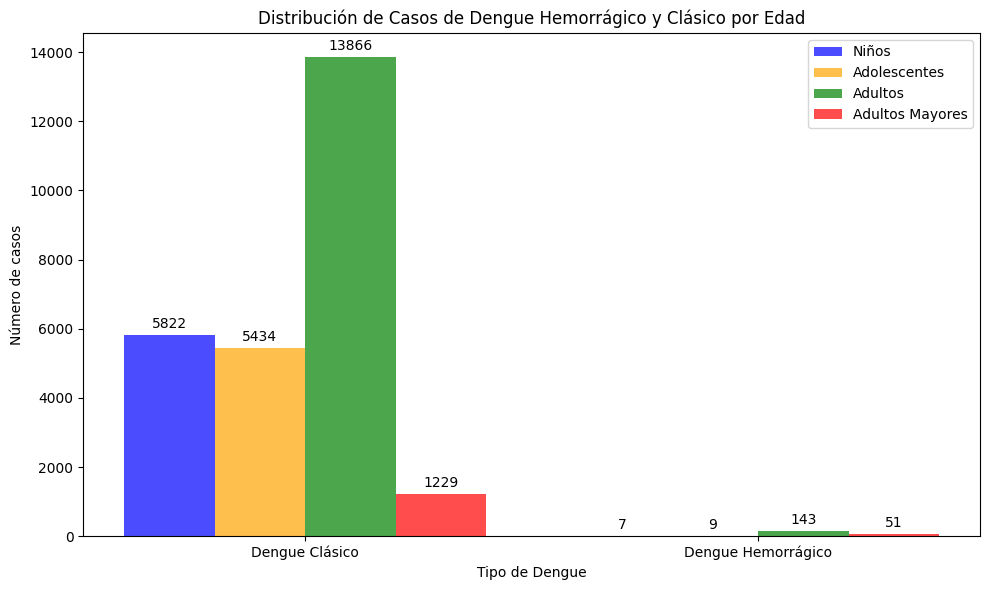

In [112]:
# Agregamos una gráfica de barras del campo EDAD_ANOS del dataset
# Categorizar los casos por grupos de edad
# Niños menores de 12 años
# Adolescentes de 12 y menores de 20 años
# Adultos =>20 y <60
# Adulto mayor >= 60
niños = df[df["EDAD_ANOS"] < 12]["HEMORRAGICOS"].value_counts()
adolescentes = df[(df["EDAD_ANOS"] >= 12) & (df["EDAD_ANOS"] < 20)]["HEMORRAGICOS"].value_counts()
adultos = df[(df["EDAD_ANOS"] >= 20) & (df["EDAD_ANOS"] < 60)]["HEMORRAGICOS"].value_counts()
adultos_mayores = df[df["EDAD_ANOS"] >= 60]["HEMORRAGICOS"].value_counts()

# Crear la figura
plt.figure(figsize=(10, 6))

# Graficar los datos
niños = plt.bar([0, 1], niños, color='blue', alpha=0.7, width=0.2, label='Niños')
adolescentes_bars = plt.bar([0.2, 1.2], adolescentes, color='orange', alpha=0.7, width=0.2, label='Adolescentes')
adultos_bars = plt.bar([0.4, 1.4], adultos, color='green', alpha=0.7, width=0.2, label='Adultos')
adultos_mayores_bars = plt.bar([0.6, 1.6], adultos_mayores, color='red', alpha=0.7, width=0.2, label='Adultos Mayores')

# Configurar la gráfica
plt.title('Distribución de Casos de Dengue Hemorrágico y Clásico por Edad')
plt.xlabel('Tipo de Dengue')
plt.ylabel('Número de casos')
plt.xticks([0.3, 1.3], ['Dengue Clásico', 'Dengue Hemorrágico'])
plt.legend()
plt.tight_layout()

# Agregar etiquetas de número a cada barra
for bars in [niños, adolescentes_bars, adultos_bars, adultos_mayores_bars]:
    for bar in bars:
        height = bar.get_height()
        plt.annotate('{}'.format(height),
                     xy=(bar.get_x() + bar.get_width() / 2, height),
                     xytext=(0, 3),
                     textcoords="offset points",
                     ha='center', va='bottom')

# Mostrar la gráfica
plt.show()

Número de casos con hemorragias: 210
Número de casos con diabetes: 558
Número de casos con hipertensión: 356
Número de casos con enfermedad ulceropeptica: 13
Número de casos con enfermedad renal: 66
Número de casos con inmunosupresión: 44
Número de casos con cirrosis hepática: 18
Número de casos de pacientes embarazadas: 339


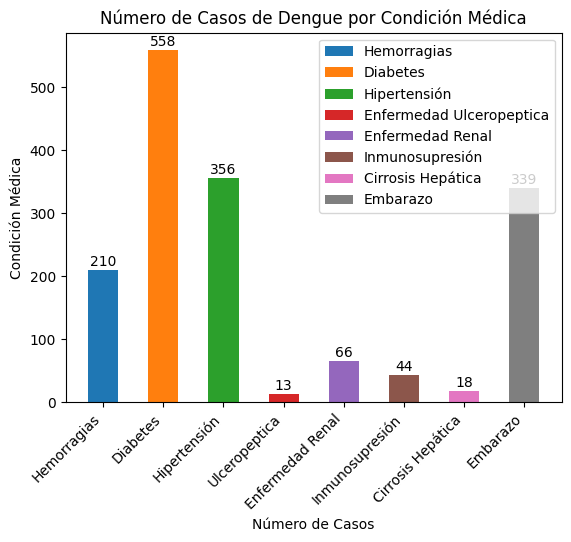

In [113]:
# Contar el número de casos por categoría de HEMORRAGICOS
# Suponiendo que 1 representa la presencia de la condición
hemorragicos = df[df["HEMORRAGICOS"] == 1]
num_hemorragicos = len(hemorragicos)
print("Número de casos con hemorragias:", num_hemorragicos)

# Repite el mismo proceso para las otras variables
diabetes = df[df["DIABETES"] == 1]
num_diabetes = len(diabetes)
print("Número de casos con diabetes:", num_diabetes)

hipertension = df[df["HIPERTENSION"] == 1]
num_hipertension = len(hipertension)
print("Número de casos con hipertensión:", num_hipertension)

ulc_peptica = df[df["ENFERMEDAD_ULC_PEPTICA"] == 1]
num_ulc_peptica = len(ulc_peptica)
print("Número de casos con enfermedad ulceropeptica:", num_ulc_peptica)

enfermedad_renal = df[df["ENFERMEDAD_RENAL"] == 1]
num_enfermedad_renal = len(enfermedad_renal)
print("Número de casos con enfermedad renal:", num_enfermedad_renal)

inmunosupr = df[df["INMUNOSUPR"] == 1]
num_inmunosupr = len(inmunosupr)
print("Número de casos con inmunosupresión:", num_inmunosupr)

cirrosis_hepatica = df[df["CIRROSIS_HEPATICA"] == 1]
num_cirrosis_hepatica = len(cirrosis_hepatica)
print("Número de casos con cirrosis hepática:", num_cirrosis_hepatica)

embarazo = df[df["EMBARAZO"] == 1]
num_embarazo = len(embarazo)
print("Número de casos de pacientes embarazadas:", num_embarazo)

fig, ax = plt.subplots()
ax.bar('Hemorragias', num_hemorragicos, 0.5, label='Hemorragias')
ax.bar('Diabetes', num_diabetes, 0.5, label='Diabetes')
ax.bar('Hipertensión', num_hipertension, 0.5, label='Hipertensión')
ax.bar('Ulceropeptica', num_ulc_peptica, 0.5, label='Enfermedad Ulceropeptica')
ax.bar('Enfermedad Renal', num_enfermedad_renal, 0.5, label='Enfermedad Renal')
ax.bar('Inmunosupresión', num_inmunosupr, 0.5, label='Inmunosupresión')
ax.bar('Cirrosis Hepática', num_cirrosis_hepatica, 0.5, label='Cirrosis Hepática')
ax.bar('Embarazo', num_embarazo, 0.5, label='Embarazo')

ax.set_xlabel('Número de Casos')
ax.set_ylabel('Condición Médica')
ax.set_title('Número de Casos de Dengue por Condición Médica')
# Agregar las cantidades encima de cada barra
for i, v in enumerate([num_hemorragicos, num_diabetes, num_hipertension, num_ulc_peptica, num_enfermedad_renal,num_inmunosupr, num_cirrosis_hepatica, num_embarazo]):
    ax.annotate(str(v), xy=(i, v), xytext=(0, 3), textcoords="offset points", ha='center')
# a 45 grados
plt.xticks(rotation=45, ha='right')
# Colocar la leyenda en la esquina superior derecha
ax.legend(loc='upper right')
plt.show()

SEXO
1    13961
2    12600
Name: count, dtype: int64


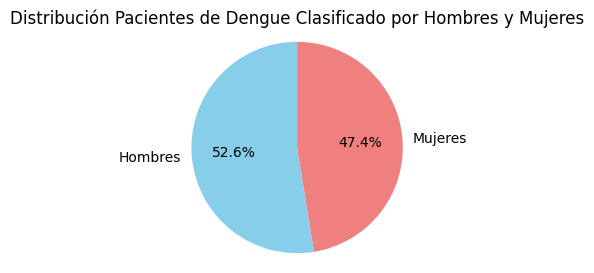

In [114]:
# Número de hombres y mujeres en el dataset
# Contar los valores de la columna "Sexo"
numporSexo = df["SEXO"].value_counts()
print(numporSexo)
# Crear la gráfica de pastel
plt.figure(figsize=(3, 3))
plt.pie(numporSexo, labels=['Hombres', 'Mujeres'], autopct='%1.1f%%', colors=['skyblue', 'lightcoral'], startangle=90)
plt.title('Distribución Pacientes de Dengue Clasificado por Hombres y Mujeres')
# Para que el gráfico de pastel sea circular
plt.axis('equal')  
plt.show()

Fallecidos:HEMORRAGICOS
2    74
1     3
Name: count, dtype: int64 


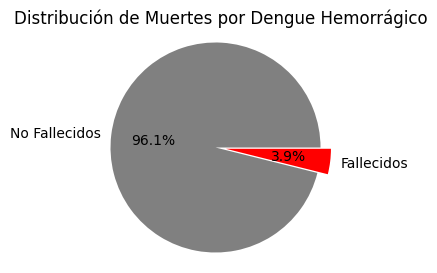

In [115]:
# calcula el porcentaje de personas fallecidas y no fallecidas utilizando el campo "DEFUNCION"
labels = ['No Fallecidos','Fallecidos' ]
colors = ['grey', 'red']
# Imprimir cantidad de fallecidos por dengue hemorrágico
fallecidos = df[df['DEFUNCION'] == 1]['HEMORRAGICOS'].value_counts()
print("Fallecidos:{} ".format(fallecidos))

# Crear la figura con un tamaño específico
plt.figure(figsize=(3, 3))
# Resaltar la porción de fallecidos
explode = (0.1, 0)  
# Graficar pastel
plt.pie(fallecidos, explode=explode, labels=labels, colors=colors, autopct='%1.1f%%')
plt.title('Distribución de Muertes por Dengue Hemorrágico')
plt.axis('equal')
plt.show()

Mediana: 23.0
Cuartil 1: 12.0
Cuartil 2: 23.0
Cuartil 3: 38.0
Cantidad de valores atípicos (EDAD_ANOS >= 80): 114


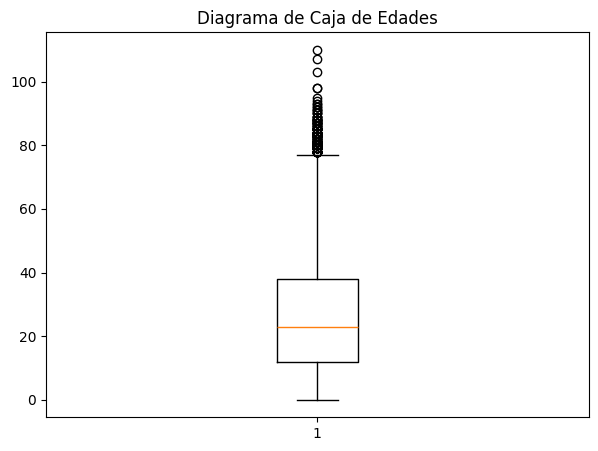

In [116]:
# Calcular los cuartiles
median = df['EDAD_ANOS'].median()
q1 = df['EDAD_ANOS'].quantile(0.25)
q2 = df['EDAD_ANOS'].quantile(0.50)
q3 = df['EDAD_ANOS'].quantile(0.75)

print("Mediana:", median)
print("Cuartil 1:", q1)
print("Cuartil 2:", q2)
print("Cuartil 3:", q3)


# Filtrar los valores atípicos
atipicos = df[df['EDAD_ANOS'] >= 80]['EDAD_ANOS']
# Contar los valores atípicos
num_atipicos = atipicos.count()
# Mostrar la cantidad de valores atípicos
print("Cantidad de valores atípicos (EDAD_ANOS >= 80):", num_atipicos)

# Crear el diagrama de caja
plt.figure(figsize=(7, 5))  
plt.boxplot(df['EDAD_ANOS'], vert=True)  
plt.title('Diagrama de Caja de Edades')  

plt.show()

Well, in this Jupyter notebook, knowledge from the previous dataset, which was the Titanic dataset, was used. Relevant data requested by the professor, such as genders affected by this disease, for example, were extracted from here. In conclusion, related to both datasets and both notebooks, I was able to implement these operations better to extract relevant data from the datasets 